In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set();

In [5]:
df1=pd.read_csv('Datasets/IT Salary Survey EU  2020.csv')
df1.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [6]:
df1.shape

(1253, 23)

In [7]:
df1.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [8]:
df1.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [9]:
missing=df1.isnull().sum()*100/len(df1)
missing_values_df=pd.DataFrame({'%missing':missing,
                                'columns': df1.columns})
missing_values_df

,%missing,columns
Timestamp,0.000000,Timestamp
Age,2.154828,Age
Gender,0.798085,Gender
City,0.000000,City
Position,0.478851,Position
Total years of experience,1.276935,Total years of experience
Years of experience in Germany,2.553871,Years of experience in Germany
Seniority level,0.957702,Seniority level
Your main technology / programming language,10.135674,Your main technology / programming language
Other technologies/programming languages you use often,12.529928,Other technologies/programming languages you u...


In [10]:
df1.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


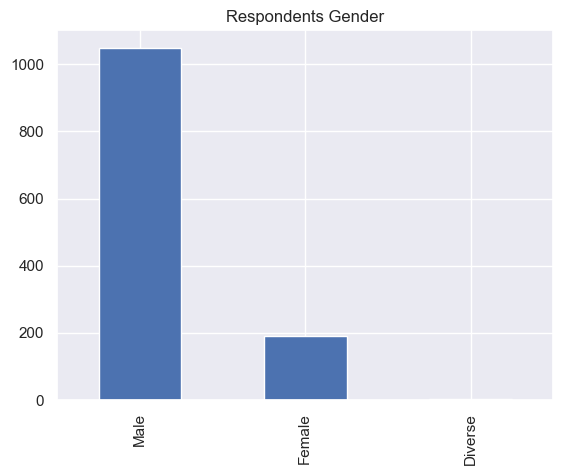

In [11]:
df1.Gender.value_counts().plot(kind='bar')
plt.title('Respondents Gender');

In [12]:
df1.Age.mean()

32.50978792822186

In [13]:
df1.groupby('Gender').describe()

Age                                                       \
          count       mean       std   min    25%   50%    75%   max   
Gender                                                                 
Diverse     2.0  27.500000  7.778175  22.0  24.75  27.5  30.25  33.0   
Female    191.0  31.261780  4.709962  21.0  28.00  31.0  34.00  45.0   
Male     1030.0  32.740777  5.793648  20.0  29.00  32.0  36.00  69.0   

        Yearly brutto salary (without bonus and stocks) in EUR                \
                                                         count          mean   
Gender                                                                         
Diverse                                                2.0      1.445000e+05   
Female                                               192.0      2.662480e+06   
Male                                                1049.0      7.384706e+04   

         ...  \
         ...   
Gender   ...   
Diverse  ...   
Female   ...   
Male     ...   

        Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country  \
                                                                                                             75%   
Gender                                                                                                             
Diverse                                            98000.0                                                         
Female                                             62750.0                                                         
Male                                               78000.0                                                         

                      \
                 max   
Gender                 
Diverse      98000.0   
Female   500000000.0   
Male        760000.0   

        Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week  \
                                                                                                    count   
Gender                                                                                                      
Diverse                                                1.0                                                  
Female                                                53.0                                                  
Male                                                 318.0                                                  

                                                             
              mean        std   min   25%   50%   75%   max  
Gender                                                       
Diverse  30.000000        NaN  30.0  30.0  30.0  30.0  30.0  
Female   11.783019  15.543212   0.0   0.0   0.0  30.0  40.0  
Male     13.152516  15.246953   0.0   0.0   0.0  30.0  40.0  

[3 rows x 32 columns]

In [14]:
df1.groupby('Employment status')['Gender'].describe()

,count,unique,top,freq
Employment status,,,,
Company Director,1,1,Male,1
Founder,3,1,Male,3
Full-time employee,1184,3,Male,1001
"Full-time position, part-time position, & self-employed (freelancing, tutoring)",1,1,Male,1
Intern,1,1,Male,1
Part-time employee,8,2,Female,5
Self-employed (freelancer),28,2,Male,27
Werkstudent,1,1,Male,1
Working Student,1,1,Male,1


In [15]:
df1.Timestamp.describe()

count                    1253
unique                   1248
top       24/11/2020 13:55:19
freq                        2
Name: Timestamp, dtype: object

In [16]:
df1.pivot_table(['Age'], index='Total years of experience', columns='Gender')

Age             \
Gender                                             Diverse     Female   
Total years of experience                                               
0                                                      NaN  29.000000   
0.8                                                    NaN        NaN   
1                                                     27.5  28.818182   
1 (as QA Engineer) / 11 in total                       NaN  34.000000   
1,5                                                    NaN  37.500000   
1.5                                                    NaN  25.000000   
10                                                     NaN  33.266667   
11                                                     NaN  34.200000   
12                                                     NaN  37.800000   
13                                                     NaN  37.000000   
14                                                     NaN  35.250000   
15                                                     NaN  38.333333   
15, thereof 8 as CTO                                   NaN        NaN   
16                                                     NaN  40.000000   
17                                                     NaN        NaN   
18                                                     NaN        NaN   
19                                                     NaN        NaN   
2                                                      NaN  29.105263   
2,5                                                    NaN  26.000000   
2.5                                                    NaN  39.000000   
20                                                     NaN  41.000000   
21                                                     NaN        NaN   
22                                                     NaN        NaN   
23                                                     NaN        NaN   
24                                                     NaN        NaN   
25                                                     NaN        NaN   
26                                                     NaN        NaN   
27                                                     NaN        NaN   
28                                                     NaN        NaN   
29                                                     NaN        NaN   
3                                                      NaN  28.066667   
3.5                                                    NaN        NaN   
30                                                     NaN        NaN   
31                                                     NaN        NaN   
383                                                    NaN        NaN   
4                                                      NaN  28.444444   
4.5                                                    NaN        NaN   
40                                                     NaN        NaN   
5                                                      NaN  31.000000   
5.5                                                    NaN        NaN   
6                                                      NaN  30.900000   
6 (not as a data scientist, but as a lab scient...     NaN        NaN   
6.5                                                    NaN  33.000000   
7                                                      NaN  31.090909   
8                                                      NaN  31.277778   
9                                                      NaN  32.142857   
less than year                                         NaN  24.000000   

                                                               
Gender                                                   Male  
Total years of experience                                      
0                                                   27.200000  
0.8                                                 24.000000  
1                                                   27.941176  
1 (as QA Engineer) /

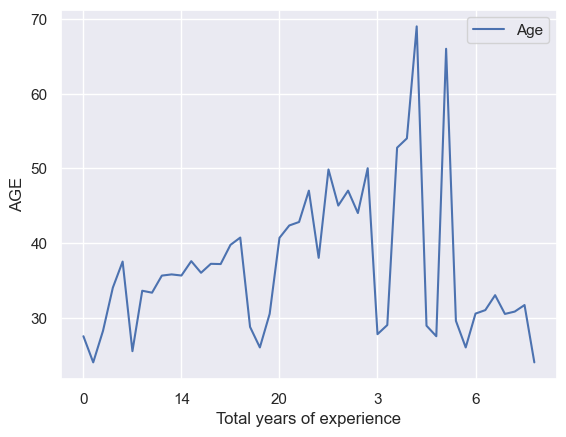

In [17]:
df1.pivot_table(['Age'], index='Total years of experience',
                aggfunc='mean').plot()
plt.ylabel('AGE');

In [18]:
#Checking unique values in the dataset
df1.apply(lambda x: len(x.unique()))

Timestamp                                                                                                                  1248
Age                                                                                                                          41
Gender                                                                                                                        4
City                                                                                                                        119
Position                                                                                                                    149
Total years of experience                                                                                                    49
Years of experience in Germany                                                                                               54
Seniority level                                                                                         

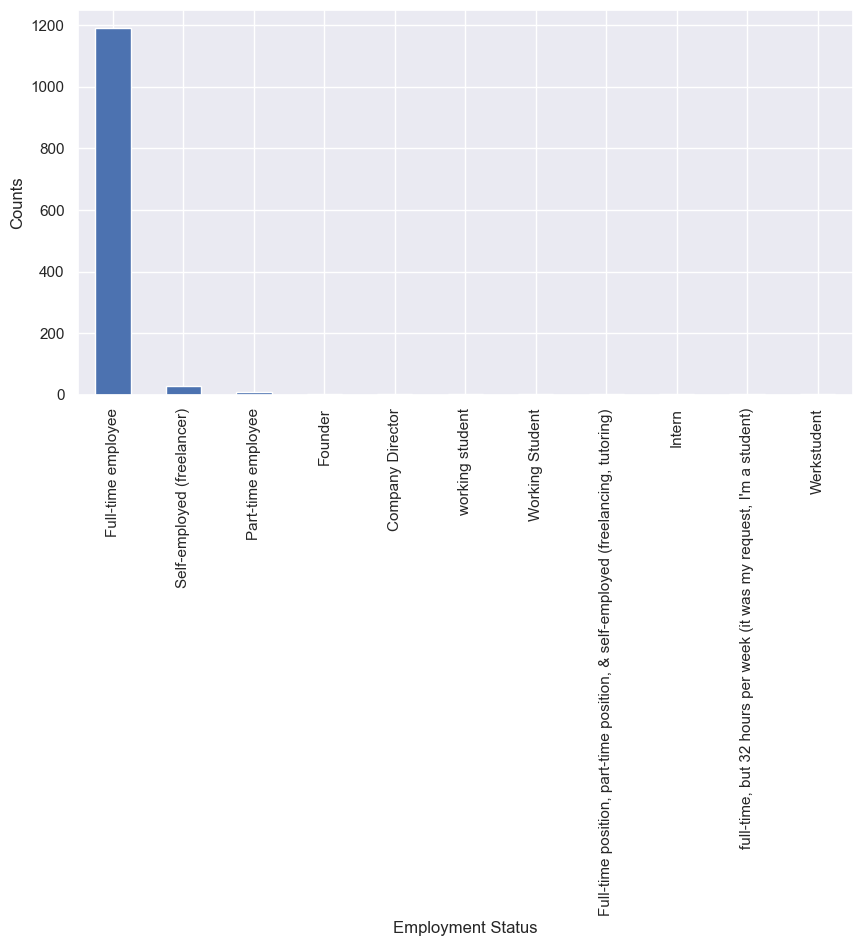

In [19]:
plt.figure(figsize=(10,5))
df1['Employment status'].value_counts().plot(kind='bar')
plt.ylabel('Counts')
plt.xlabel('Employment Status');

##### looks like most people are full-time employees

Java                  True
Python                True
PHP                   True
C++                   True
JavaScript            True
                     ...  
Go, PHP, SQL         False
Kotlin               False
Jira                 False
Qml                  False
consumer analysis    False
Name: Your main technology / programming language, Length: 256, dtype: bool


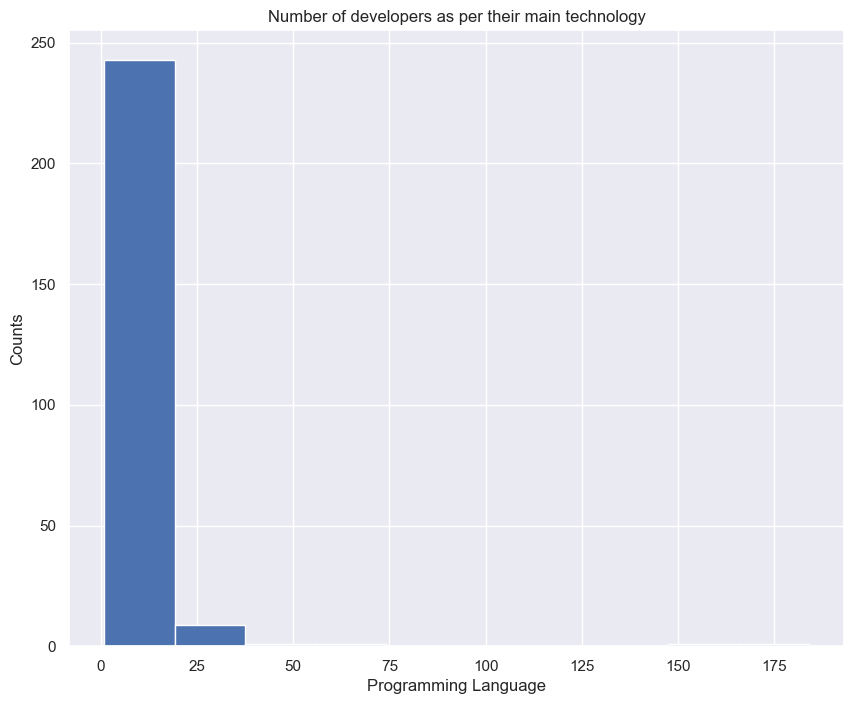

In [20]:
print(df1['Your main technology / programming language'].value_counts()>20)
plt.figure(figsize=(10,8))
df1['Your main technology / programming language'].value_counts().plot(kind='hist')
plt.title('Number of developers as per their main technology')
plt.ylabel('Counts')
plt.xlabel('Programming Language');

In [21]:
df2=pd.read_csv('Datasets/T Salary Survey EU 2019.csv')
df2.head()

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,NaN,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN


In [22]:
df2.tail()

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
986,07.01.2020 09:23:01,30.0,Male,Amsterdam,Senior,Backend Developer,10,Python,71000.0,3000.0,...,0.0,25.0,5.0,English,NaN,1000+,Product,unlimited,Telecom,NaN
987,07.01.2020 10:08:18,28.0,Male,Amsterdam,Senior,Security Engineer,7,Not Relevant,72000.0,0.0,...,0.0,27.0,5.0,English,ING,1000+,Bank,unlimited,Finance / Insurance,NaN
988,07.01.2020 16:52:43,42.0,Male,Munich,Senior,Manager,9,Not Relevant,68000.0,10000.0,...,NaN,30.0,5.0,English,SAP,1000+,Product,unlimited,Сommerce,NaN
989,08.01.2020 11:18:41,33.0,Male,Berlin,Senior,Software Architect,15,Javascript / Typescript,100000.0,3000.0,...,NaN,26.0,6.0,English,NaN,1000+,Product,more than 1 year,Health,NaN
990,08.01.2020 22:20:08,32.0,Male,Frankfurt,Middle,Fullstack Developer,5,Java,63000.0,NaN,...,NaN,30.0,5.0,Deutsch,NaN,1000+,Consulting / Agency,unlimited,Transport,NaN


In [23]:
df2.shape, df2.size

((991, 23), 22793)

In [24]:
df2.dtypes

Zeitstempel                                                                                              object
Age                                                                                                     float64
Gender                                                                                                   object
City                                                                                                     object
Seniority level                                                                                          object
Position (without seniority)                                                                             object
Years of experience                                                                                       int64
Your main technology / programming language                                                              object
Yearly brutto salary (without bonus and stocks)                                                         

In [25]:
df2.describe()

,Age,Years of experience,Yearly brutto salary (without bonus and stocks),Yearly bonus,Yearly stocks,Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,Yearly bonus one year ago. Only answer if staying in same country,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,0
count,882.000000,991.000000,990.000000,530.000000,203.000000,603.000000,257.000000,139.000000,931.000000,639.000000,0.0
mean,32.416100,8.529768,72562.212121,7857.169811,18263.119803,65803.895522,8144.000000,8204.476331,27.924812,6.462050,NaN
std,5.262496,5.036320,23947.379182,10320.628344,61012.387773,20554.017614,15067.876701,45224.397374,4.482911,15.384601,NaN
min,20.000000,0.000000,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,NaN
25%,29.000000,5.000000,60000.000000,300.000000,1.000000,55000.000000,1000.000000,0.000000,26.000000,2.000000,NaN
50%,32.000000,8.000000,70000.000000,5000.000000,2000.000000,65000.000000,5000.000000,0.100000,28.000000,4.000000,NaN
75%,35.000000,11.000000,80000.000000,10000.000000,20000.000000,75000.000000,9000.000000,3000.000000,30.000000,7.000000,NaN
max,54.000000,30.000000,216000.000000,80000.000000,750000.000000,200000.000000,150000.000000,520000.000000,100.000000,365.000000,NaN


In [26]:
df2.columns

Index(['Zeitstempel', 'Age', 'Gender', 'City', 'Seniority level',
       'Position (without seniority)', 'Years of experience',
       'Your main technology / programming language',
       'Yearly brutto salary (without bonus and stocks)', 'Yearly bonus',
       'Yearly stocks',
       'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
       'Yearly bonus one year ago. Only answer if staying in same country',
       'Yearly stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Number of home office days per month',
       'Main language at work', 'Company name ', 'Company size',
       'Company type', 'Сontract duration', 'Company business sector', '0'],
      dtype='object')

In [27]:
df2.apply(lambda x: len(x.unique()))

Zeitstempel                                                                                             991
Age                                                                                                      34
Gender                                                                                                    2
City                                                                                                     76
Seniority level                                                                                           7
Position (without seniority)                                                                             52
Years of experience                                                                                      26
Your main technology / programming language                                                              43
Yearly brutto salary (without bonus and stocks)                                                         174
Yearly bonus                

In [28]:
df2.info

<bound method DataFrame.info of              Zeitstempel   Age Gender       City Seniority level  \
0    02.12.2019 11:18:26  33.0   Male     Berlin          Senior   
1    02.12.2019 11:18:35  29.0   Male     Berlin          Middle   
2    02.12.2019 11:18:56   NaN   Male     Berlin          Middle   
3    02.12.2019 11:19:08  30.0   Male     Berlin          Senior   
4    02.12.2019 11:19:37  32.0   Male     Berlin          Senior   
..                   ...   ...    ...        ...             ...   
986  07.01.2020 09:23:01  30.0   Male  Amsterdam          Senior   
987  07.01.2020 10:08:18  28.0   Male  Amsterdam          Senior   
988  07.01.2020 16:52:43  42.0   Male     Munich          Senior   
989  08.01.2020 11:18:41  33.0   Male     Berlin          Senior   
990  08.01.2020 22:20:08  32.0   Male  Frankfurt          Middle   

    Position (without seniority)  Years of experience  \
0            Fullstack Developer                   13   
1              Backend Developer     

In [29]:
df2.isnull().sum()

Zeitstempel                                                                                               0
Age                                                                                                     109
Gender                                                                                                    0
City                                                                                                      0
Seniority level                                                                                          15
Position (without seniority)                                                                              1
Years of experience                                                                                       0
Your main technology / programming language                                                              14
Yearly brutto salary (without bonus and stocks)                                                           1
Yearly bonus                

In [30]:
missiing=df2.isnull().sum()*100/len(df2)
df2_missing_df=pd.DataFrame({'% missing': missiing,
                'columns': df2.columns})
df2_missing_df

,% missing,columns
Zeitstempel,0.000000,Zeitstempel
Age,10.998991,Age
Gender,0.000000,Gender
City,0.000000,City
Seniority level,1.513623,Seniority level
Position (without seniority),0.100908,Position (without seniority)
Years of experience,0.000000,Years of experience
Your main technology / programming language,1.412714,Your main technology / programming language
Yearly brutto salary (without bonus and stocks),0.100908,Yearly brutto salary (without bonus and stocks)
Yearly bonus,46.518668,Yearly bonus


In [31]:
df2_new=df2.dropna(thresh=0.6*len(df2), axis=1)
df2_new.head()

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company size,Company type,Сontract duration,Company business sector
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,58000.0,29.0,4.0,English,50-100,Startup,unlimited,Tourism
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,55000.0,22.0,4.0,English,10-50,Product,unlimited,Scientific Activities
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,55000.0,27.0,NaN,English,1000+,Startup,unlimited,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,24.0,NaN,English,100-1000,Product,unlimited,Transport
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,56000.0,30.0,0.0,English,50-100,Product,unlimited,Automotive


 - Dropped columns with more that 60% of missing data

In [32]:
df2_new.isnull().sum()

Zeitstempel                                                                                               0
Age                                                                                                     109
Gender                                                                                                    0
City                                                                                                      0
Seniority level                                                                                          15
Position (without seniority)                                                                              1
Years of experience                                                                                       0
Your main technology / programming language                                                              14
Yearly brutto salary (without bonus and stocks)                                                           1
Yearly brutto salary (withou

In [33]:
df2_new.shape

(991, 17)

In [34]:
df2_new.columns

Index(['Zeitstempel', 'Age', 'Gender', 'City', 'Seniority level',
       'Position (without seniority)', 'Years of experience',
       'Your main technology / programming language',
       'Yearly brutto salary (without bonus and stocks)',
       'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Number of home office days per month',
       'Main language at work', 'Company size', 'Company type',
       'Сontract duration', 'Company business sector'],
      dtype='object')

In [35]:
df2_new.Age.shape, df2_new.Gender.shape

((991,), (991,))

In [36]:
df2_new['Seniority level'].value_counts()

Senior       587
Middle       272
Junior        73
Lead          35
Head           6
Principal      3
Name: Seniority level, dtype: int64

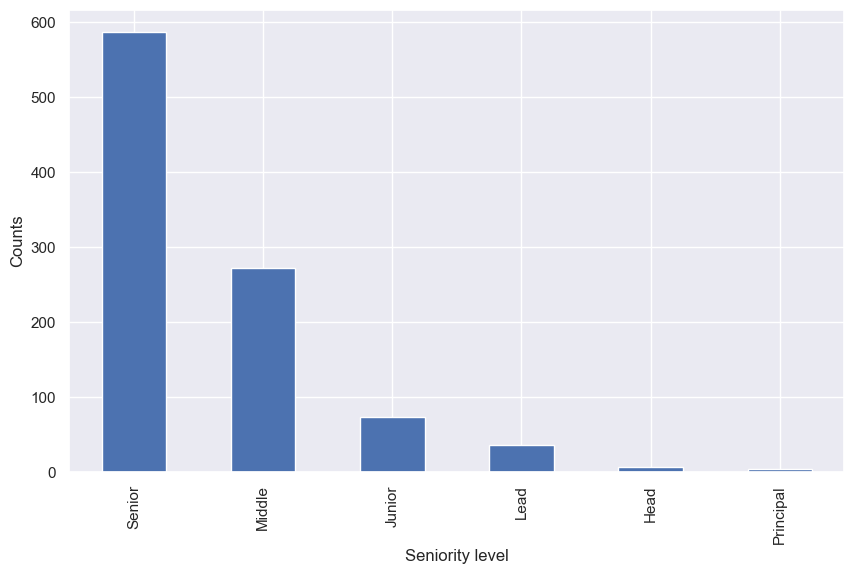

In [37]:
plt.figure(figsize=(10,6))
df2_new['Seniority level'].value_counts().plot(kind='bar')
plt.xlabel('Seniority level')
plt.ylabel('Counts');

In [38]:
df2_new.groupby('Gender')['Seniority level'].describe()

,count,unique,top,freq
Gender,,,,
Female,151,3,Middle,64
Male,825,6,Senior,532


In [39]:
df2_new.pivot_table(['Age'], index='Seniority level', columns='Gender')

Age           
Gender              Female       Male
Seniority level                      
Head                   NaN  31.600000
Junior           29.233333  28.717949
Lead                   NaN  32.555556
Middle           31.553571  30.863636
Principal              NaN  31.500000
Senior           33.875000  33.539615

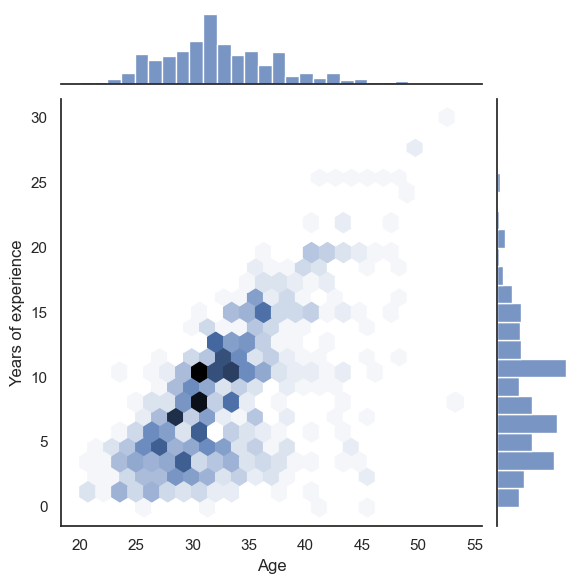

In [40]:
with sns.axes_style('white'):
    sns.jointplot(x=df2_new.Age, y=df2_new['Years of experience'], data=df2_new, kind='hex')

A jointplot between Age and Years of experience

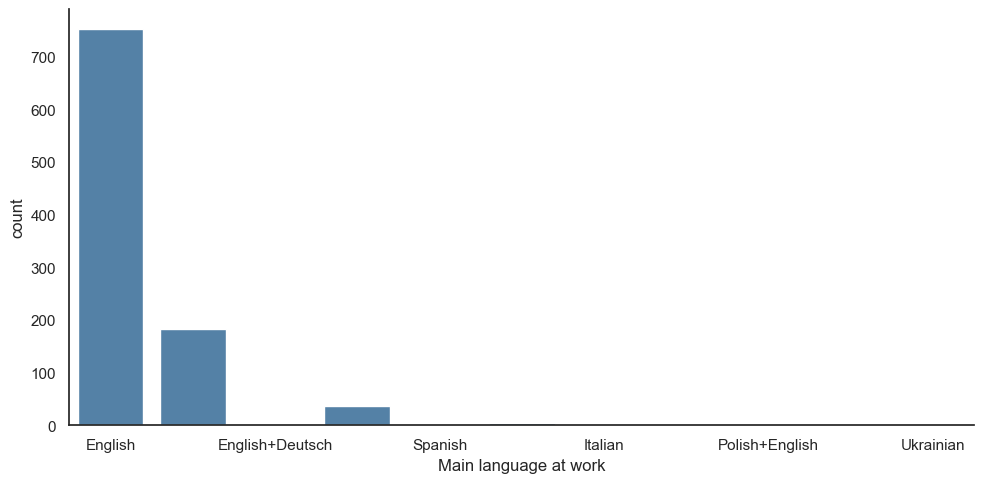

In [41]:
with sns.axes_style('white'):
    m=sns.catplot(x='Main language at work', data=df2_new, aspect=2, 
                 kind='count',color='steelblue')
    m.set_xticklabels(step=2)

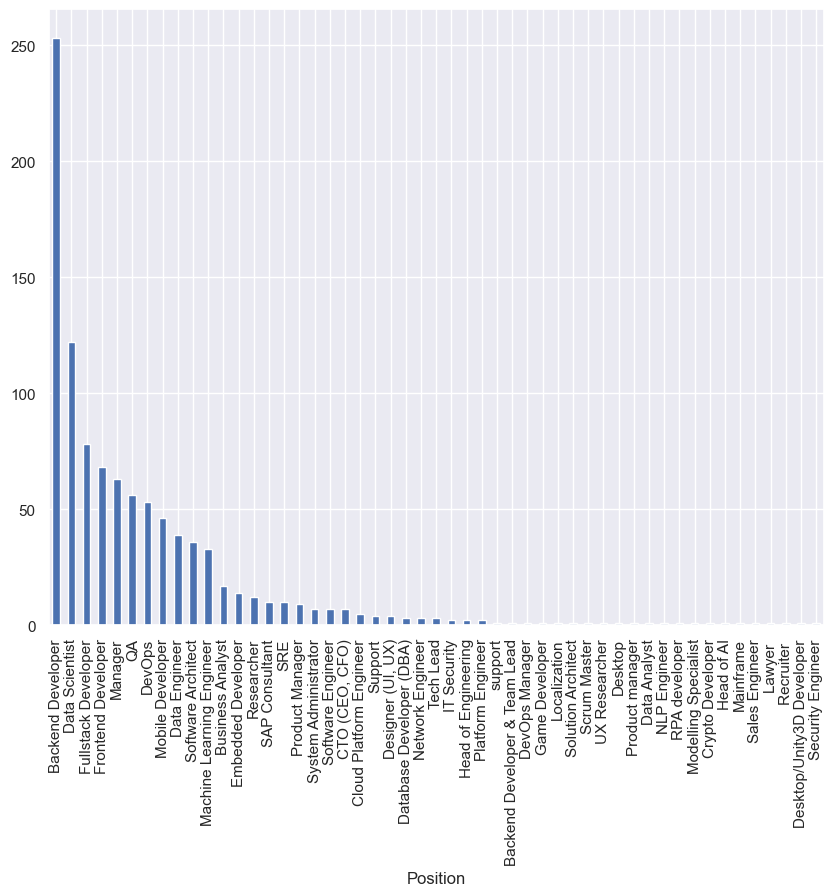

In [42]:
plt.figure(figsize=(10,8))
df2_new['Position (without seniority)'].value_counts().plot(kind='bar')
plt.xlabel('Position');

- From the above figure, most employees are backend developers followed  by data scientists and so on

In [43]:
df2['Age_decade']=df2.loc[:,('Age')].map(lambda Age:10*(Age//10))

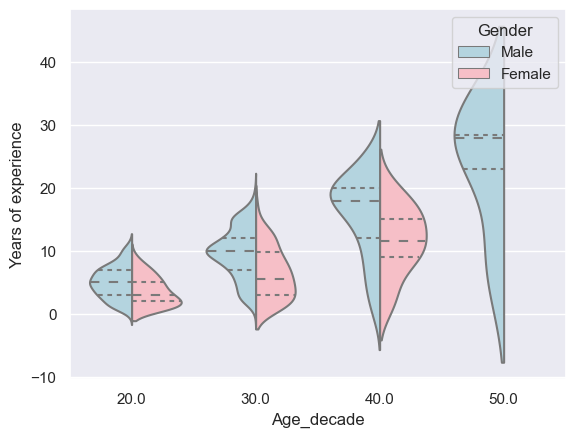

In [44]:
sns.violinplot(x='Age_decade', y='Years of experience', hue='Gender', data=df2,
               split=True, inner='quartile',
               palette=['lightblue', 'lightpink']);

From the above violin plots, more key insights are drawn from the dataset. In all age brackets(Age_decade) Men tend to have more years of experience than women, which is quite interesting. Also it's very surprising to see there are no women who are beyond age 50.

In [45]:
(df2.Age>50).sum()

2